In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def entropy(sequence):
    items, counts = np.unique(sequence, return_counts=True)
    probs = counts/np.sum(counts)
    return -np.sum(probs * np.log2(probs))

In [14]:
enropies = []
for red in range(51):
    blue = 50 - red
    balls = ["Blue"] * blue + ["Red"] * red
    enropies.append(entropy(balls))

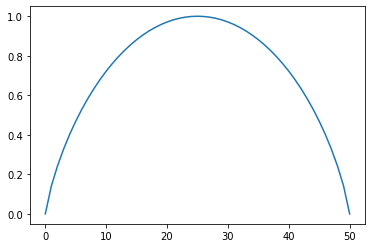

In [15]:
 plt.plot(enropies)

In [19]:
df = pd.DataFrame()
    

In [34]:
df["Age"] = np.random.randint(30, 60, 100)
df["Sex"] = np.random.randint(0, 2, 100)
df["Kids"] = np.random.randint(1, 4, 100)


In [35]:
entropy(df.Sex)

0.9997114417528099

In [36]:
pivot = 50

In [37]:
left = df.loc[df["Age"] < pivot]

right = df.loc[df["Age"] >= pivot]

In [38]:
entropy(right.Sex)

0.9919924034538556

In [39]:
pl, pr = len(left) / len(df), len(right) / len(df)

In [40]:
entropy(df.Sex) - pl * entropy(left.Sex) - pr * entropy(right.Sex)

0.00321979468303768

In [41]:
def infogain(X, y, label):
    pivot = X[label].mean() # just an assumption
    
    left = y.loc[X[label] < pivot]
    right = y.loc[X[label] >= pivot]
    
    prob_l, prob_r = len(left)/len(y), len(right)/len(y)
    
    return entropy(y) - prob_l * entropy(left) - prob_r * entropy(right)
    

In [44]:
X = df[['Age', 'Kids']]

In [45]:
y = df.Sex

In [47]:
infogain(X, y, 'Kids')

0.0001623573610307627